## Task 3: Customer Segmentation / Clustering


#### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load datasets


In [2]:
customers = pd.read_csv(r'dataset/Customers.csv')
transactions = pd.read_csv(r'dataset/Transactions.csv')

#### 3.1 Grouping the customers based on CustomerID

In [3]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'TransactionDate': 'max',
    'TransactionID': 'count'
}).reset_index()

In [4]:
customer_transactions.head(3)

,CustomerID,TotalValue,Quantity,Price,TransactionDate,TransactionID
0,C0001,3354.52,12,278.3340,2024-11-02 17:04:16,5
1,C0002,1862.74,10,208.9200,2024-12-03 01:41:41,4
2,C0003,2725.38,14,195.7075,2024-08-24 18:54:04,4


In [5]:
customer_data = pd.merge(customers, customer_transactions, on='CustomerID')

In [6]:
customer_data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['TransactionDate'])).dt.days


#### 3.2 Normalization

In [7]:
numerical_features = ['TotalValue', 'Quantity', 'Price', 'TransactionID', 'Recency']
scaler = StandardScaler()
customer_data[numerical_features] = scaler.fit_transform(customer_data[numerical_features])

#### 3.3 Test for best 'k' value

In [8]:
inertia = []
silhouette_scores = []
db_indices = []

for k in range(2, 11):  # Test for k=2 to k=10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    customer_data['Cluster'] = kmeans.fit_predict(customer_data[numerical_features])
    
    # Calculate clustering metrics
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customer_data[numerical_features], customer_data['Cluster']))
    db_indices.append(davies_bouldin_score(customer_data[numerical_features], customer_data['Cluster']))

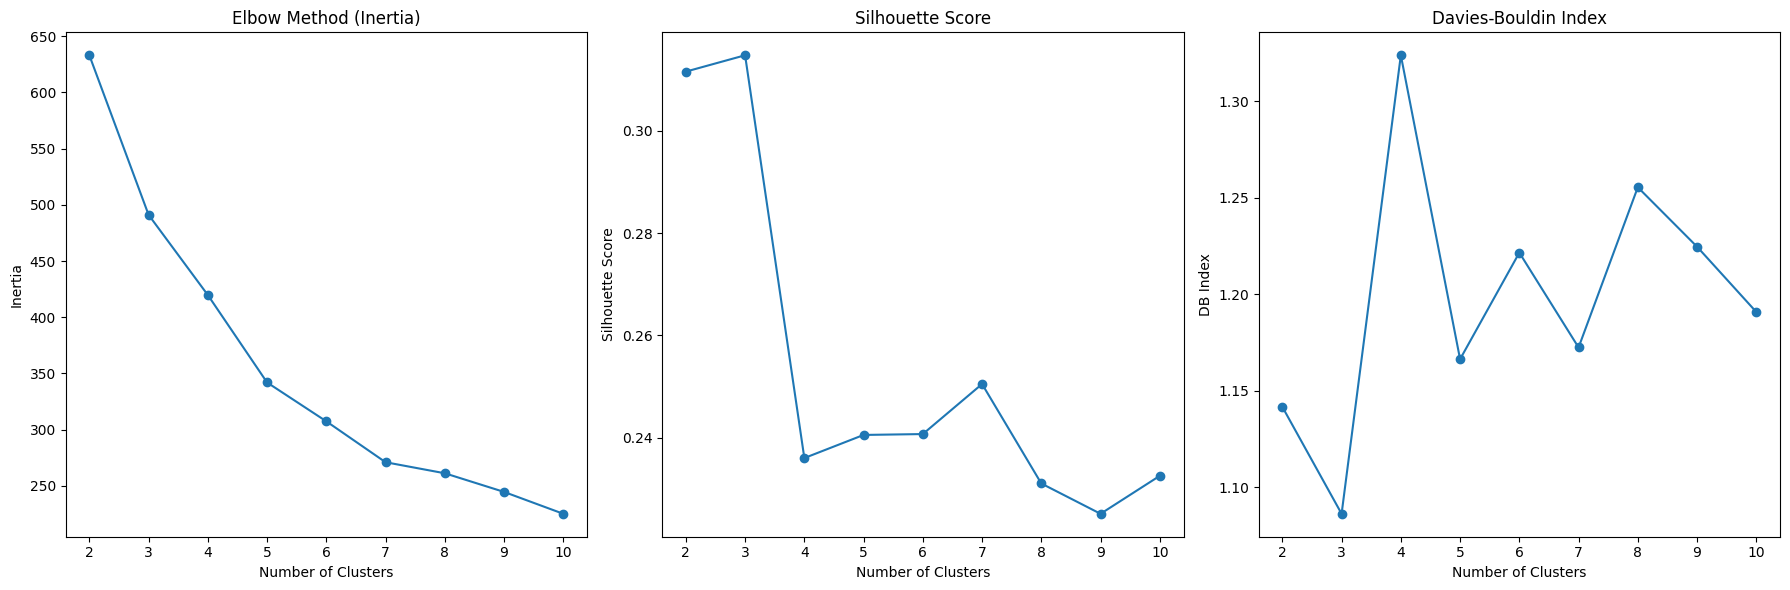

In [9]:
# Plot Elbow Method, Silhouette Scores, and DB Index
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Inertia Plot (Elbow Method)
axes[0].plot(range(2, 11), inertia, marker='o')
axes[0].set_title('Elbow Method (Inertia)')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')

# Silhouette Score Plot
axes[1].plot(range(2, 11), silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')

# DB Index Plot
axes[2].plot(range(2, 11), db_indices, marker='o')
axes[2].set_title('Davies-Bouldin Index')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('DB Index')

plt.tight_layout()
plt.show()

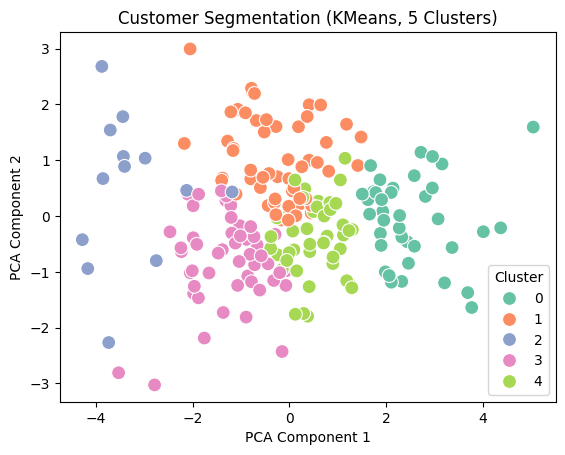

In [10]:
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[numerical_features])

# Visualize the clusters using PCA (2D visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data[numerical_features])

sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='Set2', s=100)
plt.title(f'Customer Segmentation (KMeans, {optimal_clusters} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [11]:
print(f'Optimal Clusters: {optimal_clusters}')
print(f'Davies-Bouldin Index: {db_indices[optimal_clusters - 2]}')
print(f'Silhouette Score: {silhouette_scores[optimal_clusters - 2]}')

Optimal Clusters: 5
Davies-Bouldin Index: 1.1663159149296163
Silhouette Score: 0.24055032585329672
